#Problema de la Guía 3  
###S. Schiavinato - LU 153/11

####Código utilitario, librerías y funcionalidad de IPython

In [ ]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

plt.rcParams["figure.figsize"] = (5*(1+np.sqrt(5))/2, 5)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["lines.linewidth"] = 2.5

##Ejercicio 4  
###Obtener a partir de una distribución uniforme una distribución exponencial

La transformación que debemos usar es y(x) = - Ln(x)/s, siendo s el parámetro de la distribución exponencial

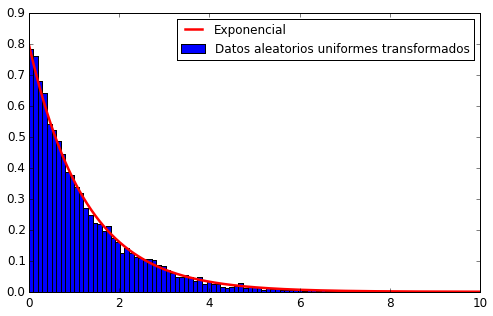

In [131]:
def G3_E9(s=1):
    #Datos
    N, min_x, max_x, n_bins = 10000, 0, 10, 100
    bins = np.linspace(min_x, max_x, n_bins) #Bins para el histograma
    U = rnd.uniform(0,1,N) #Resultados de N experimentos aleatorios entre 0 y 1
    t = np.linspace(min_x, max_x, 1000) #Vector para graficar la PDF de la distribución exponencial
    
    #Funciones para la impresión
    expD = lambda x, s: s * np.exp(-s*x) #Distribución exponencial
    f = lambda x, s: -1/s*np.log(x) #y = f(x) = -1/s*ln(x), si x = Uniforme(0,1)
    
    #Gráficos
    plt.figure(1, figsize=(5*(1+np.sqrt(5))/2, 5))
    hist, bins = np.histogram(f(U,s), bins = bins, density=True,)
    plt.bar(bins[:-1], hist, width=bins[1]-bins[0],  label="Datos aleatorios uniformes transformados");
    plt.plot(t, expD(t, s), 'r-',label="Exponencial");
    plt.legend(loc=0)

interact(G3_E9, s=(0.5,1.5,0.1)); #Genera control interactivo. Es lo mismo que anotar la función con @interact

##Ejercicio 9

###Funciones utilitarias, distribuciones a usar

In [133]:
gauss = lambda x, s, mu: 1/(s*np.sqrt(2*np.pi)) * np.exp(- (x - mu)**2/(2*s**2))
cauchy = lambda x : 1/np.pi * 1 /(1 + x**2) 
f = lambda x, a, s1, s2: a * gauss(x, s=s1 , mu=0) + (1-a) * gauss(x, s = s2, mu=0) #Suma de Gaussianas, 

###Inciso a: Graficar una distribución N(0,75) y una Cauchy estándar normalizadas

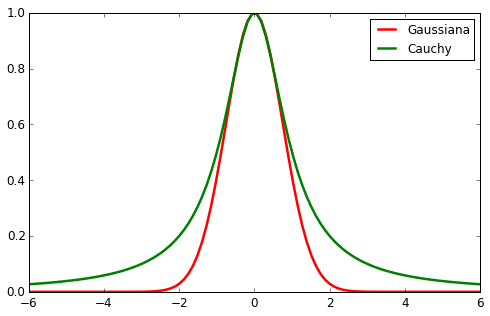

In [134]:
def G3_E4_a():
    t = np.linspace(-6,6,100)
    plt.figure(1)
    plt.plot(t, gauss(t, s=0.75,mu=0)/gauss(0,s = 0.75,mu=0), "r-", label="Gaussiana")
    plt.plot(t, cauchy(t)/cauchy(0),"g-", label="Cauchy")
    plt.legend(loc=0)

G3_E4_a()

###Inciso b: Graficar suma de Gaussianas frente a una distribución de Cauchy

Al sumar dos distribuciones proporcionales a una Gaussiana, debemos mantener la probabilidad para compararlo con la Cauchy, y por eso a + b = 1

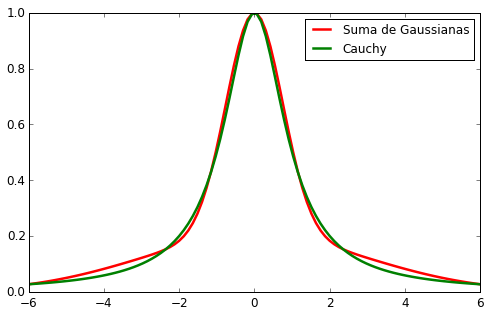

In [138]:
@interact(a = (0,1,0.1),s1=(0.5,4,0.1),s2=(0.5,4,0.1),x=(3,15,1))
def G3_E4_b(a = 0.5, s1 = 0.75, s2 = 3, x = 6):
    t = np.linspace(-x,x,100)
    plt.figure(1)    
    plt.plot(t, f(t, a, s1, s2)/f(0, a, s1, s2), "r-", label="Suma de Gaussianas")
    plt.plot(t, cauchy(t)/cauchy(0),"g-", label="Cauchy")
    plt.legend(loc=0)